In [58]:
# import chipr
import chipr.bed as bed
import chipr.rankprod as rankprod
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob
sns.set(style='white', rc={'figure.figsize':(20,10)})

In [68]:
root_dir = '/lustre/scratch/microbiome/n10853499/02-encode'
files = ['00-data/01-h3k27ac/00-A549/exp_1_ENCSR778NQS/ENCFF637BNE.bed', '00-data/01-h3k27ac/00-A549/exp_1_ENCSR778NQS/ENCFF697WAE.bed', '00-data/01-h3k27ac/00-A549/exp_1_ENCSR778NQS/ENCFF932ORM.bed']
files_h3k27ac_e1 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/01-h3k27ac/00-A549/exp_1_*/*.bed')
files_h3k27ac_e2 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/01-h3k27ac/00-A549/exp_2_*/*.bed')
files_h3k27me3_e1 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/00-h3k27me3/00-h1/exp_1_*/*.bed')
files_h3k27me3_e2 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/00-h3k27me3/00-h1/exp_2_*/*.bed')
files_max_e1 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/02-MAX/00-k562/exp_1_*/*.bed')
files_max_e2 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/02-MAX/00-k562/exp_2_*/*.bed')
files_h3k4me3_e1 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/03-h3k4me3/00-MG63/*/*.bed')
files_h3k4me3_e2 = glob.glob('/lustre/scratch/microbiome/n10853499/02-encode/00-data/03-h3k4me3/00-HAP1/*/*.bed')

In [14]:
files_max_e1

[]

In [69]:
# files_h3k27ac_e2
bedfs_h3k27ac_e1 = [bed.BedFile(i, 'Peaks') for i in files_h3k27ac_e1]
bedfs_h3k27ac_e2 = [bed.BedFile(i, 'Peaks') for i in files_h3k27ac_e2]
bedfs_h3k27me3_e1 = [bed.BedFile(i, 'Peaks') for i in files_h3k27me3_e1]
bedfs_h3k27me3_e2 = [bed.BedFile(i, 'Peaks') for i in files_h3k27me3_e2]
bedfs_max_e1 = [bed.BedFile(i, 'Peaks') for i in files_max_e1]
bedfs_max_e2 = [bed.BedFile(i, 'Peaks') for i in files_max_e2]

In [54]:
bedfs_h3k4me3_e1 = [bed.BedFile(i, 'Peaks') for i in files_h3k4me3_e1]
bedfs_h3k4me3_e2 = [bed.BedFile(i, 'Peaks') for i in files_h3k4me3_e2]

In [56]:
bedfs_h3k4me3_e1

[<chipr.bed.BedFile at 0x7fa632216fd0>, <chipr.bed.BedFile at 0x7fa634435dd8>]

In [70]:
results_e1 = rankprod.performrankprod(bedfs_h3k27ac_e1,
                                 2,
                                 'pvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

Using high fragmentation: False
mismatch for chrUn_GL000214v1, it has been removed.
mismatch for chr1_KI270712v1_random, it has been removed.
mismatch for chr9_KI270720v1_random, it has been removed.
109802 Pseudo-peaks used for replicate number: 1
54746 Pseudo-peaks used for replicate number: 2
65836 Pseudo-peaks used for replicate number: 3
Calculating rank product probabilities...
Calculating binomial threshold...
Cleaning up output...
27.09 % Primary peaks
72.91 % Secondary peaks


/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


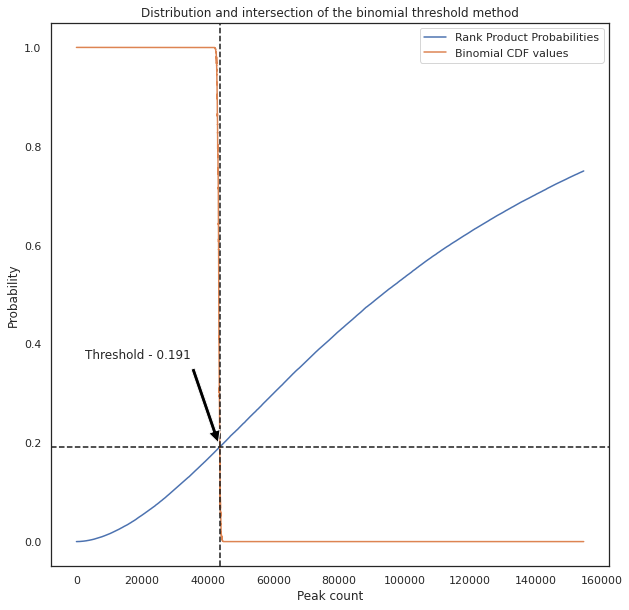

In [30]:
len(results_e1[1])
fig, ax = plt.subplots()
probs, = ax.plot(range(len(np.array(results_e1[1][1])[np.array(results_e1[1][1]) < 0.75])), np.array(results_e1[1][1])[np.array(results_e1[1][1]) < 0.75])
probs.set_label("Rank Product Probabilities")
binoms, = ax.plot(range(len(np.array(results_e1[1][0])[np.array(results_e1[1][1]) < 0.75])), np.array(results_e1[1][0])[np.array(results_e1[1][1]) < 0.75])
binoms.set_label("Binomial CDF values")
ax.axvline(x=min(results_e1[1][3]), color='k', linestyle='--')
ax.axhline(y=min(results_e1[1][2]), color='k', linestyle='--')
ax.annotate(format('Threshold - %.3f' % (min(results_e1[1][2]))), xy=(min(results_e1[1][3]), min(results_e1[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax.set(xlabel="Peak count", ylabel="Probability", title="Distribution and intersection of the binomial threshold method")
ax.legend()
fig.show()


In [71]:
results_e2 = rankprod.performrankprod(bedfs_h3k27ac_e2,
                                 2,
                                 'pvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

Using high fragmentation: False
mismatch for chr22_KI270734v1_random, it has been removed.
28983 Pseudo-peaks used for replicate number: 1
51373 Pseudo-peaks used for replicate number: 2
59851 Pseudo-peaks used for replicate number: 3
Calculating rank product probabilities...
Calculating binomial threshold...
Cleaning up output...
28.53 % Primary peaks
71.47 % Secondary peaks


/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


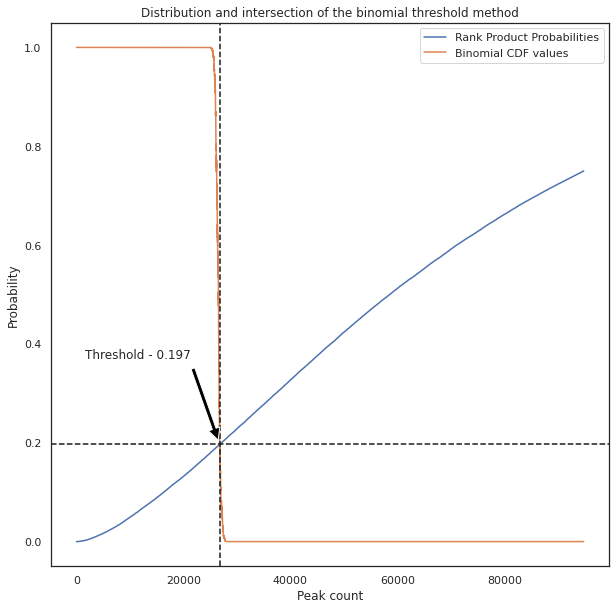

In [29]:
len(results_e2[1])
fig, ax = plt.subplots()
probs, = ax.plot(range(len(np.array(results_e2[1][1])[np.array(results_e2[1][1]) < 0.75])), np.array(results_e2[1][1])[np.array(results_e2[1][1]) < 0.75])
probs.set_label("Rank Product Probabilities")
binoms, = ax.plot(range(len(np.array(results_e2[1][0])[np.array(results_e2[1][1]) < 0.75])), np.array(results_e2[1][0])[np.array(results_e2[1][1]) < 0.75])
ax.axvline(x=min(results_e2[1][3]), color='k', linestyle='--')
ax.axhline(y=min(results_e2[1][2]), color='k', linestyle='--')
ax.annotate(format('Threshold - %.3f' % (min(results_e2[1][2]))), xy=(min(results_e2[1][3]), min(results_e2[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
binoms.set_label("Binomial CDF values")
ax.set(xlabel="Peak count", ylabel="Probability", title="Distribution and intersection of the binomial threshold method")
ax.legend()
fig.show()


In [72]:
results_e3 = rankprod.performrankprod(bedfs_h3k27me3_e1,
                                 2,
                                 'signalvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

results_e4 = rankprod.performrankprod(bedfs_h3k27me3_e2,
                                 2,
                                 'signalvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

Using high fragmentation: False
mismatch for chrUn_KI270590v1, it has been removed.
mismatch for chrUn_KI270448v1, it has been removed.
mismatch for chrUn_KI270750v1, it has been removed.
mismatch for chrUn_KI270517v1, it has been removed.
mismatch for chr14_GL000225v1_random, it has been removed.
mismatch for chr16_KI270728v1_random, it has been removed.
mismatch for chrUn_KI270435v1, it has been removed.
mismatch for chr4_GL000008v2_random, it has been removed.
mismatch for chr14_GL000009v2_random, it has been removed.
mismatch for chrUn_KI270589v1, it has been removed.
mismatch for chrUn_KI270746v1, it has been removed.
mismatch for chrUn_KI270751v1, it has been removed.
mismatch for chr17_KI270730v1_random, it has been removed.
mismatch for chrUn_KI270754v1, it has been removed.
mismatch for chr1_KI270709v1_random, it has been removed.
mismatch for chr1_KI270712v1_random, it has been removed.
mismatch for chrUn_GL000214v1, it has been removed.
mismatch for chrUn_GL000218v1, it has 

In [59]:
results_e5 = rankprod.performrankprod(bedfs_h3k4me3_e1,
                                 1,
                                 'pvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

results_e6 = rankprod.performrankprod(bedfs_h3k4me3_e2,
                                 1,
                                 'pvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

Using high fragmentation: False
19728 Pseudo-peaks used for replicate number: 1
27773 Pseudo-peaks used for replicate number: 2
Calculating rank product probabilities...
Calculating binomial threshold...
Cleaning up output...
19.53 % Primary peaks
80.47 % Secondary peaks
Using high fragmentation: False
Calculating rank product probabilities...
Calculating binomial threshold...


TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'int'

In [8]:
results_all = rankprod.performrankprod(
                                bedfs_h3k27me3_e2 + bedfs_h3k27me3_e2,
                                 2,
                                 'pvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

Using high fragmentation: False
mismatch for chr1_KI270712v1_random, it has been removed.
mismatch for chrEBV, it has been removed.
mismatch for chrUn_KI270750v1, it has been removed.
mismatch for chrUn_KI270438v1, it has been removed.
mismatch for chr22_KI270733v1_random, it has been removed.
mismatch for chr4_GL000008v2_random, it has been removed.
mismatch for chrUn_KI270442v1, it has been removed.
mismatch for chrUn_KI270589v1, it has been removed.
mismatch for chrUn_KI270757v1, it has been removed.
mismatch for chrUn_KI270751v1, it has been removed.
mismatch for chr17_KI270730v1_random, it has been removed.
mismatch for chr14_KI270722v1_random, it has been removed.
mismatch for chr22_KI270735v1_random, it has been removed.
mismatch for chrUn_GL000224v1, it has been removed.
mismatch for chrUn_GL000219v1, it has been removed.
mismatch for chrUn_KI270744v1, it has been removed.
mismatch for chr9_KI270720v1_random, it has been removed.
mismatch for chrUn_GL000214v1, it has been remov

In [33]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Distribution and intersection of the binomial threshold method")
probs, = ax1.plot(range(len(np.array(results_e1[1][1])[np.array(results_e1[1][1]) < 0.75])), np.array(results_e1[1][1])[np.array(results_e1[1][1]) < 0.75])
probs.set_label("Rank Product Probabilities")
binoms, = ax1.plot(range(len(np.array(results_e1[1][0])[np.array(results_e1[1][1]) < 0.75])), np.array(results_e1[1][0])[np.array(results_e1[1][1]) < 0.75])
binoms.set_label("Binomial CDF values")
# ax1.axvline(x=min(results_e1[1][3]), color='k', linestyle='--')
# ax1.axhline(y=min(results_e1[1][2]), color='k', linestyle='--')
ax1.annotate(format('Threshold - %.3f' % (min(results_e1[1][2]))), xy=(min(results_e1[1][3]), min(results_e1[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax1.set(ylabel="Probability", title="A) ENCSR778NQS - H3K27ac")
# ax1.legend()

probs, = ax2.plot(range(len(np.array(results_e2[1][1])[np.array(results_e2[1][1]) < 0.75])), np.array(results_e2[1][1])[np.array(results_e2[1][1]) < 0.75])
# probs.set_label("Rank Product Probabilities")
binoms, = ax2.plot(range(len(np.array(results_e2[1][0])[np.array(results_e2[1][1]) < 0.75])), np.array(results_e2[1][0])[np.array(results_e2[1][1]) < 0.75])
# ax2.axvline(x=min(results_e2[1][3]), color='k', linestyle='--')
# ax2.axhline(y=min(results_e2[1][2]), color='k', linestyle='--')
ax2.annotate(format('Threshold - %.3f' % (min(results_e2[1][2]))), xy=(min(results_e2[1][3]), min(results_e2[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
# binoms.set_label("Binomial CDF values")
ax2.set(xlabel="Peak count", ylabel="Probability", title="B) ENCSR783SNV - H3K27ac")
fig.legend(loc='lower center')

fig.show()

SyntaxError: invalid syntax (<ipython-input-33-e29b0faf2b85>, line 1)

/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


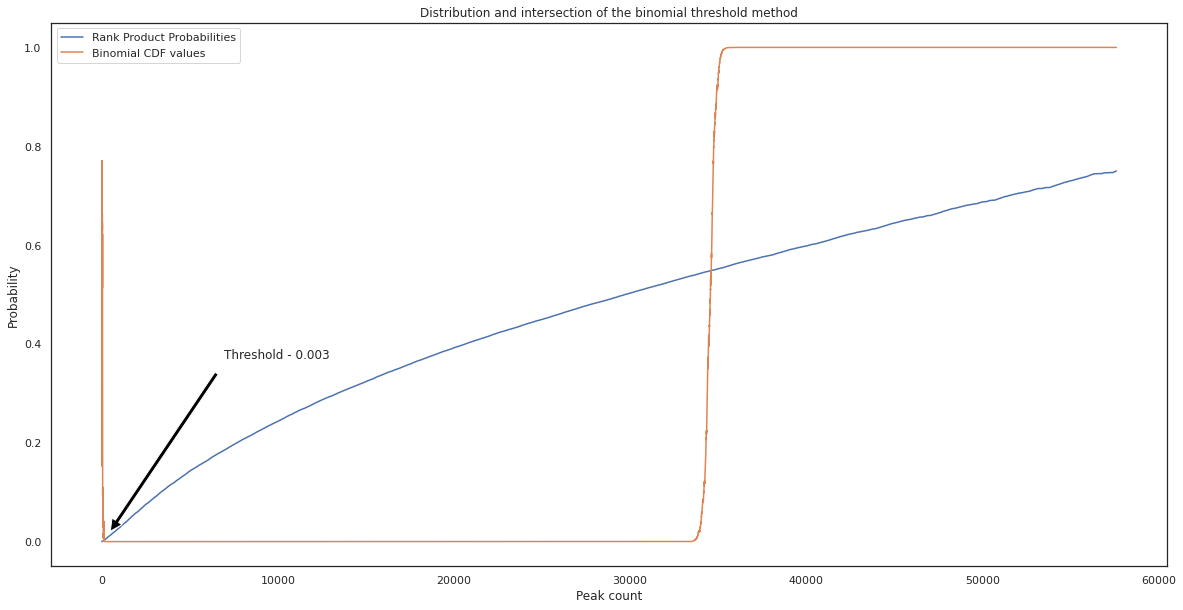

In [49]:
results_e3[1][2]
fig, ax = plt.subplots()
probs, = ax.plot(range(len(np.array(results_all[1][1])[np.array(results_all[1][1]) < 0.75])), np.array(results_all[1][1])[np.array(results_all[1][1]) < 0.75])
probs.set_label("Rank Product Probabilities")
binoms, = ax.plot(range(len(np.array(results_all[1][0])[np.array(results_all[1][1]) < 0.75])), np.array(results_all[1][0])[np.array(results_all[1][1]) < 0.75])
# ax.axvline(x=min(results_e3[1][3]), color='k', linestyle='--')
# ax.axhline(y=min(results_e3[1][2]), color='k', linestyle='--')
ax.annotate(format('Threshold - %.3f' % (min(results_all[1][2]))), xy=(min(results_all[1][3]), min(results_all[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
binoms.set_label("Binomial CDF values")
ax.set(xlabel="Peak count", ylabel="Probability", title="Distribution and intersection of the binomial threshold method")
ax.legend()
fig.show()

In [73]:
results_m1 = rankprod.performrankprod(bedfs_max_e1,
                                 2,
                                 'signalvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

results_m2 = rankprod.performrankprod(bedfs_max_e2,
                                 2,
                                 'signalvalue',
                                 'all',
                                 'average',
                                 0.5,
                                 0.05,
                                 './',
                                 20,
                                 False,
                                 False)

Using high fragmentation: False
mismatch for chr16_KI270728v1_random, it has been removed.
mismatch for chrUn_GL000220v1, it has been removed.
mismatch for chr9_KI270719v1_random, it has been removed.
mismatch for chr17_KI270729v1_random, it has been removed.
mismatch for chr1_KI270707v1_random, it has been removed.
mismatch for chr1_KI270712v1_random, it has been removed.
mismatch for chr22_KI270736v1_random, it has been removed.
mismatch for chrM, it has been removed.
mismatch for chr1_KI270711v1_random, it has been removed.
mismatch for chrUn_KI270745v1, it has been removed.
mismatch for chr15_KI270727v1_random, it has been removed.
mismatch for chrEBV, it has been removed.
mismatch for chrUn_KI270467v1, it has been removed.
26773 Pseudo-peaks used for replicate number: 1
38628 Pseudo-peaks used for replicate number: 2
Calculating rank product probabilities...
Calculating binomial threshold...
Cleaning up output...
22.71 % Primary peaks
77.29 % Secondary peaks
Using high fragmentati

/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


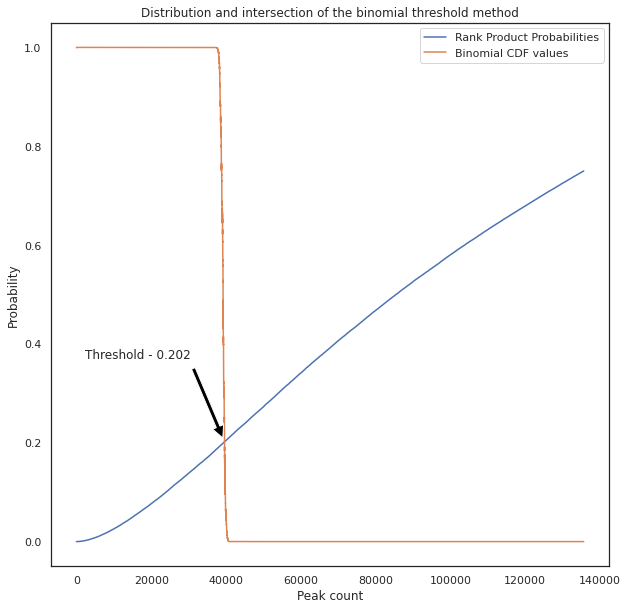

In [22]:
results_m1[1][2]
fig, ax = plt.subplots()
probs, = ax.plot(range(len(np.array(results_m1[1][1])[np.array(results_m1[1][1]) < 0.75])), np.array(results_m1[1][1])[np.array(results_m1[1][1]) < 0.75])
probs.set_label("Rank Product Probabilities")
binoms, = ax.plot(range(len(np.array(results_m1[1][0])[np.array(results_m1[1][1]) < 0.75])), np.array(results_m1[1][0])[np.array(results_m1[1][1]) < 0.75])
# ax.axvline(x=min(results_e3[1][3]), color='k', linestyle='--')
# ax.axhline(y=min(results_e3[1][2]), color='k', linestyle='--')
ax.annotate(format('Threshold - %.3f' % (min(results_m1[1][2]))), xy=(min(results_m1[1][3]), min(results_m1[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
binoms.set_label("Binomial CDF values")
ax.set(xlabel="Peak count", ylabel="Probability", title="Distribution and intersection of the binomial threshold method")
ax.legend()
fig.show()

/home/n10853499/.conda/envs/r-3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


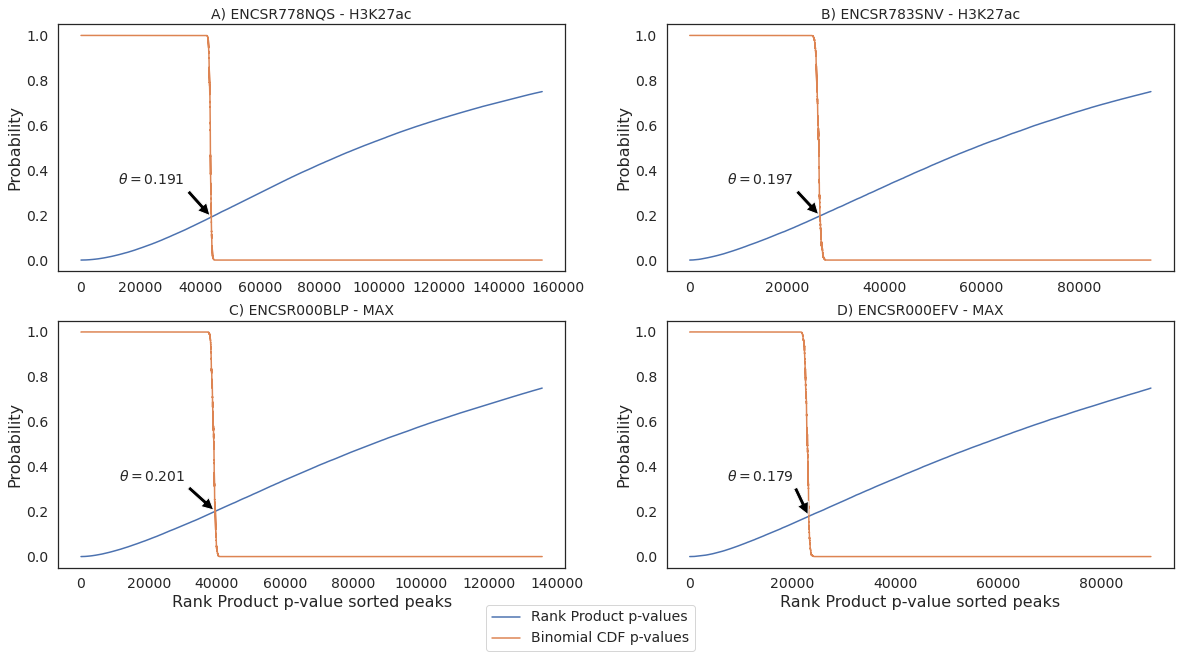

In [79]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle("Distribution and intersection of the binomial threshold method")
probs, = ax1.plot(range(len(np.array(results_e1[1][1])[np.array(results_e1[1][1]) < 0.75])), np.array(results_e1[1][1])[np.array(results_e1[1][1]) < 0.75])
probs.set_label("Rank Product p-values")
binoms, = ax1.plot(range(len(np.array(results_e1[1][0])[np.array(results_e1[1][1]) < 0.75])), np.array(results_e1[1][0])[np.array(results_e1[1][1]) < 0.75])
binoms.set_label("Binomial CDF p-values")
# ax1.axvline(x=min(results_e1[1][3]), color='k', linestyle='--')
# ax1.axhline(y=min(results_e1[1][2]), color='k', linestyle='--')
ax1.annotate(format(r'$\theta =$%.3f' % (min(results_e1[1][2]))), xy=(min(results_e1[1][3]), min(results_e1[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax1.set(ylabel="Probability", title="A) ENCSR778NQS - H3K27ac")
# ax1.legend()

probs, = ax2.plot(range(len(np.array(results_e2[1][1])[np.array(results_e2[1][1]) < 0.75])), np.array(results_e2[1][1])[np.array(results_e2[1][1]) < 0.75])
# probs.set_label("Rank Product Probabilities")
binoms, = ax2.plot(range(len(np.array(results_e2[1][0])[np.array(results_e2[1][1]) < 0.75])), np.array(results_e2[1][0])[np.array(results_e2[1][1]) < 0.75])
# ax2.axvline(x=min(results_e2[1][3]), color='k', linestyle='--')
# ax2.axhline(y=min(results_e2[1][2]), color='k', linestyle='--')
ax2.annotate(format(r'$\theta =$%.3f' % (min(results_e2[1][2]))), xy=(min(results_e2[1][3]), min(results_e2[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
# binoms.set_label("Binomial CDF values")
ax2.set(ylabel="Probability", title="B) ENCSR783SNV - H3K27ac")

probs, = ax3.plot(range(len(np.array(results_m1[1][1])[np.array(results_m1[1][1]) < 0.75])), np.array(results_m1[1][1])[np.array(results_m1[1][1]) < 0.75])
# probs.set_label("Rank Product Probabilities")
binoms, = ax3.plot(range(len(np.array(results_m1[1][0])[np.array(results_m1[1][1]) < 0.75])), np.array(results_m1[1][0])[np.array(results_m1[1][1]) < 0.75])
# binoms.set_label("Binomial CDF values")
# ax1.axvline(x=min(results_e1[1][3]), color='k', linestyle='--')
# ax1.axhline(y=min(results_e1[1][2]), color='k', linestyle='--')
ax3.annotate(format(r'$\theta =$%.3f' % (min(results_m1[1][2]))), xy=(min(results_m1[1][3]), min(results_m1[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax3.set(xlabel="Rank Product p-value sorted peaks", ylabel="Probability", title="C) ENCSR000BLP - MAX")
# ax1.legend()

probs, = ax4.plot(range(len(np.array(results_m2[1][1])[np.array(results_m2[1][1]) < 0.75])), np.array(results_m2[1][1])[np.array(results_m2[1][1]) < 0.75])
# probs.set_label("Rank Product Probabilities")
binoms, = ax4.plot(range(len(np.array(results_m2[1][0])[np.array(results_m2[1][1]) < 0.75])), np.array(results_m2[1][0])[np.array(results_m2[1][1]) < 0.75])
# ax2.axvline(x=min(results_e2[1][3]), color='k', linestyle='--')
# ax2.axhline(y=min(results_e2[1][2]), color='k', linestyle='--')
ax4.annotate(format(r'$\theta =$%.3f' % (min(results_m2[1][2]))), xy=(min(results_m2[1][3]), min(results_m2[1][2])),  xycoords='data',
            xytext=(0.25, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
# binoms.set_label("Binomial CDF values")
ax4.set(xlabel="Rank Product p-value sorted peaks", ylabel="Probability", title="D) ENCSR000EFV - MAX")
fig.legend(loc='lower center')

fig.show()

plt.savefig('binomial_threshold.eps', format='eps')

In [82]:
h3k27ac_e1_pooled = pd.read_csv("/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/exp_1_all_h3k27ac_recovered.bed", sep='\t', header=None)
h3k27ac_e2_pooled = pd.read_csv("/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/exp_2_all_h3k27ac_recovered.bed", sep='\t', header=None)

h3k27ac_e1 = pd.read_csv("/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/01-h3k27ac/exp_1_all.bed", sep='\t', header=None)
h3k27ac_e2 = pd.read_csv("/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/01-h3k27ac/exp_2_all.bed", sep='\t', header=None)

In [84]:
h3k27ac_e1['len'] = h3k27ac_e1[2] - h3k27ac_e1[1]
h3k27ac_e2['len'] = h3k27ac_e2[2] - h3k27ac_e2[1]

h3k27ac_e1_pooled['len'] = h3k27ac_e1_pooled[2] - h3k27ac_e1_pooled[1]
h3k27ac_e2_pooled['len'] = h3k27ac_e2_pooled[2] - h3k27ac_e2_pooled[1]

In [86]:
print(h3k27ac_e1['len'].min(), h3k27ac_e1['len'].max(), h3k27ac_e1['len'].mean(),  h3k27ac_e1['len'].count())
print(h3k27ac_e1_pooled['len'].min(), h3k27ac_e1_pooled['len'].max(), h3k27ac_e1_pooled['len'].mean(), len(h3k27ac_e1_pooled['len']),  h3k27ac_e1_pooled[h3k27ac_e1_pooled[10]>0][11].mean(), h3k27ac_e1_pooled[h3k27ac_e1_pooled[10]>0]['len'].shape[0] / h3k27ac_e1_pooled[10].shape[0])
print('-------')
print(h3k27ac_e2['len'].min(), h3k27ac_e2['len'].max(), h3k27ac_e2['len'].mean(), h3k27ac_e2['len'].count())
print(h3k27ac_e2_pooled['len'].min(), h3k27ac_e2_pooled['len'].max(), h3k27ac_e2_pooled['len'].mean(), h3k27ac_e2_pooled['len'].count(), h3k27ac_e2_pooled[h3k27ac_e2_pooled[10]>0][11].mean(), h3k27ac_e2_pooled[h3k27ac_e2_pooled[10]>0]['len'].shape[0] / h3k27ac_e2_pooled[10].shape[0])


117 44175 1138.7040408652474 70084
217 81322 1521.4680011775097 101910 0.5870265353843241 0.5183004611912472
-------
134 35449 1205.7089074133623 40427
217 58862 1836.0371135181813 53269 0.5680300684345049 0.5875837729260921


In [49]:
def print_stats(chipr_path, annotate_path, primary_only=True):
    chipr_out = pd.read_csv(chipr_path, sep='\t', header=None)
    annotate_out = pd.read_csv(annotate_path, sep='\t', header=None)
    if primary_only:
        chipr_out = chipr_out[chipr_out[3].str.contains("primary")]
        annotate_out = annotate_out[10**-annotate_out[10] >= 0.05]
    chipr_out['len'] = chipr_out[2] - chipr_out[1]
    annotate_out['len'] = annotate_out[2] - annotate_out[1]
    print(chipr_out['len'].min(), chipr_out['len'].max(), chipr_out['len'].mean(), chipr_out['len'].std(), max(chipr_out[7]), len(chipr_out["len"]))
    print(annotate_out['len'].min(), annotate_out['len'].max(), annotate_out['len'].mean(), chipr_out['len'].std(), len(annotate_out["len"]))
    print("Mean covered fraction - ", annotate_out[annotate_out[17]>0][18].mean(), "Percent peaks covered - ", annotate_out[annotate_out[17]>0]['len'].shape[0] / annotate_out[17].shape[0])
    print('--------------------')
    return chipr_out, annotate_out

In [80]:
print('h3k27ac')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/01-h3k27ac/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/exp_1_all_h3k27ac_recovered.bed')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/01-h3k27ac/exp_2_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/exp_2_all_h3k27ac_recovered.bed')

h3k27ac


ValueError: Integers to negative integer powers are not allowed.

In [3]:
h3k27me3_e1_aligned = pd.read_csv('/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/00-h3k27me3/exp_1_aligned.bed', sep='\t', header=None)
h3k27me3_e2_aligned = pd.read_csv('/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/00-h3k27me3/exp_2_aligned.bed', sep='\t', header=None)

In [50]:
print('h3k27me3 - Optimal only')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/00-h3k27me3/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/03-annotate_optimal/00-h3k27me3/exp_1_aligned.bed')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/00-h3k27me3/exp_2_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/03-annotate_optimal/00-h3k27me3/exp_2_aligned.bed')

print('h3k27me3 - All')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/00-h3k27me3/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/00-h3k27me3/exp_1_aligned.bed', primary_only=False)
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/00-h3k27me3/exp_2_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/00-h3k27me3/exp_2_aligned.bed', primary_only=False)

h3k27me3 - Optimal only
92 19200 1085.8229216340803 1426.2723160994374 0.0399817610834302 6291
175 4402 422.930519272194 1426.2723160994374 21819
Mean covered fraction -  0.609322437144662 Percent peaks covered -  0.07255144598744213
--------------------
75 23761 1071.4336569579289 1882.7691935724115 0.0299994896681437 6489
115 3736 281.1018198933166 1882.7691935724115 25496
Mean covered fraction -  0.6678282237442922 Percent peaks covered -  0.017179165359272042
--------------------
h3k27me3 - All
72 19841 218.87015306406013 364.7537275100144 0.8953882165950696 269887
175 23889 824.9281681407265 364.7537275100144 30641
Mean covered fraction -  0.7621836387634711 Percent peaks covered -  0.9902744688489279
--------------------
52 23761 173.971416781293 394.86246244618894 0.8978355554659595 327150
115 24680 697.6389485527258 394.86246244618894 39108
Mean covered fraction -  0.7625382967700257 Percent peaks covered -  0.9895673519484505
--------------------


In [51]:
print('h3k4me3 - Optimal only')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/03-h3k4me3/00-MG63/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/03-annotate_optimal/03-h3k4me3/00-MG63/exp_1_aligned.bed')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/03-h3k4me3/01-HAP1/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/03-annotate_optimal/03-h3k4me3/01-HAP1/exp_1_aligned.bed')

print('h3k4me3 - All')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/03-h3k4me3/00-MG63/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/03-h3k4me3/00-MG63/exp_1_aligned.bed', primary_only=False)
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/03-h3k4me3/01-HAP1/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/03-h3k4me3/01-HAP1/exp_1_aligned.bed', primary_only=False)

h3k4me3 - Optimal only
236 11715 2737.8895933537387 1133.9375906500836 0.0919875502488605 4574
253 16677 1432.3001111817027 1133.9375906500836 12592
Mean covered fraction -  0.8917023640023002 Percent peaks covered -  0.13810355781448538
--------------------
157 9379 2623.9386254121227 1025.8235808672243 0.0928786960113901 3943
232 11032 1461.3350500148558 1025.8235808672243 10097
Mean covered fraction -  0.9023559565217392 Percent peaks covered -  0.10250569476082004
--------------------
h3k4me3 - All
133 17403 1522.4794005891645 1189.989538336207 0.9415097759850136 23423
253 18409 1904.9466557833582 1189.989538336207 20827
Mean covered fraction -  0.8638948152657004 Percent peaks covered -  0.9939021462524608
--------------------
123 20035 1603.7343059693826 1127.693574804592 0.9409071296612715 19466
232 20678 1974.2111036112049 1127.693574804592 17778
Mean covered fraction -  0.869461023736687 Percent peaks covered -  0.9929125885926426
--------------------


In [52]:
print('h3k4me1 - Optimal only')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/04-h3k4me1/00-BE2C/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/03-annotate_optimal/04-h3k4me1/00-BE2C/exp_1_aligned.bed')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/04-h3k4me1/01-HAP1/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/03-annotate_optimal/04-h3k4me1/01-HAP1/exp_1_aligned.bed')

print('h3k4me1 - All')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/04-h3k4me1/00-BE2C/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/04-h3k4me1/00-BE2C/exp_1_aligned.bed', primary_only=False)
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/04-h3k4me1/01-HAP1/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/04-h3k4me1/01-HAP1/exp_1_aligned.bed', primary_only=False)

h3k4me1 - Optimal only
191 10532 1117.4178159987018 728.7253686775312 0.0469891007333436 6163
213 9242 1131.357831264507 728.7253686775312 39636
Mean covered fraction -  0.7500399272103004 Percent peaks covered -  0.14696235745282066
--------------------
200 9745 1220.4645436893204 756.8186058062189 0.0649979033938348 12875
198 6592 1002.0267464058908 756.8186058062189 51334
Mean covered fraction -  0.8003970243572395 Percent peaks covered -  0.05758366774457475
--------------------
h3k4me1 - All
121 10532 612.3512693597318 397.81157004227293 0.9218329979138382 100208
213 12028 1157.4984920615138 397.81157004227293 40121
Mean covered fraction -  0.7712513288351561 Percent peaks covered -  0.993694075421849
--------------------
109 9745 666.3940887099393 468.3534842936186 0.9294218107657708 123188
198 15415 1155.641103848947 468.3534842936186 68850
Mean covered fraction -  0.7840680866768043 Percent peaks covered -  0.9933478576615832
--------------------


In [41]:
print('h3k27me3 - Optimal only')
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/00-h3k27me3/exp_1_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/00-h3k27me3/exp_1_aligned.bed', primary_only=False)
c, i = print_stats('/lustre/scratch/microbiome/n10853499/02-encode/01-output/01-chipr/00-h3k27me3/exp_2_all.bed', '/lustre/scratch/microbiome/n10853499/02-encode/02-annotate/00-h3k27me3/exp_2_aligned.bed', primary_only=False)

h3k27me3 - Optimal only
72 19841 218.87015306406013 269887
175 23889 824.9281681407265 30641
Mean covered fraction -  0.7621836387634711 Percent peaks covered -  0.9902744688489279
--------------------
52 23761 173.971416781293 327150
115 24680 697.6389485527258 39108
Mean covered fraction -  0.7625382967700257 Percent peaks covered -  0.9895673519484505
--------------------


In [48]:
c

,0,1,2,3,4,5,6,7,8,len
0,chr19,3356226,3363252,primary_peak_145327,1000,.,182.65700,2.583021e-08,0.011188,7026
1,chr1,50413602,50428771,primary_peak_10405,1000,.,216.20162,1.748280e-07,0.023867,15169
2,chr11,72240739,72242751,primary_peak_56738,1000,.,130.11215,2.569168e-07,0.023867,2012
3,chr2,181677612,181680065,primary_peak_174349,1000,.,94.88520,2.760957e-07,0.023867,2453
4,chr2,118831646,118842536,primary_peak_168315,1000,.,126.23610,3.036353e-07,0.023867,10890
...,...,...,...,...,...,...,...,...,...,...
327145,chrX,153644306,153645760,secondary_peak_326452,19,.,92.62923,8.978356e-01,0.897836,1454
327146,chrX,154522532,154522620,secondary_peak_326561,19,.,9.51685,8.978356e-01,0.897836,88
327147,chrY,2786960,2787117,secondary_peak_326636,19,.,11.38331,8.978356e-01,0.897836,157
327148,chrY,6892348,6893847,secondary_peak_326659,19,.,77.07229,8.978356e-01,0.897836,1499
